# Artificial Neural Network

### Importing the libraries

In [1]:
# import the libraries 
import tensorflow as tf
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA


In [2]:
print(tf.__version__)

2.6.0


In [3]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y.astype(float),x.astype(float)).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)




## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('KeyboardData.csv')
X = dataset.iloc[:,:-1 ].values
y = dataset.iloc[:,-1].values

In [5]:
print(X)
print(y)

[[3.80584214e-01 1.36823497e-03 5.08000000e-02 2.80000000e+01
  8.47000000e+02 7.00000000e+00 0.00000000e+00 1.00000000e+00
  6.71040577e-01]
 [3.78428780e-01 2.18476127e-02 3.62000000e-02 5.00000000e+01
  1.56700000e+03 2.50000000e+01 0.00000000e+00 1.00000000e+00
  4.54650866e-01]
 [3.49012031e-01 7.12569236e-04 2.10000000e-02 8.60000000e+01
  1.56500000e+03 4.10000000e+01 0.00000000e+00 1.00000000e+00
  1.71950473e-01]
 [3.54816649e-01 0.00000000e+00 4.57750000e-02 8.00000000e+00
  5.81000000e+02 5.15000000e+02 1.70000000e+01 1.00000000e+00
  8.76935444e-02]
 [2.36303990e-01 1.07759165e-03 2.02000000e-02 4.30000000e+01
  5.50000000e+01 9.55000000e+02 2.12000000e+02 1.50000000e+01
  2.55948976e-01]
 [4.30975746e-01 6.77585959e-03 3.48000000e-02 4.20000000e+01
  8.37000000e+02 4.59000000e+02 6.60000000e+01 1.20000000e+01
  2.83575610e-01]
 [5.85703902e-01 1.25543177e-02 7.22000000e-02 1.30000000e+01
  1.26000000e+03 6.03000000e+02 2.98000000e+02 3.10000000e+01
  6.10817694e-01]
 [3.66

### Encoding categorical data

### Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
#random state = 1 is setting the seed of randomly picking the test and train sets so we can get consistent results 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

### Feature Scaling

In [18]:
#feature scaling everything is crucial to deep learning and ANNs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)



X_test = sc.transform(X_test)



## Part 2 - Building the ANN

### Initializing the ANN

In [8]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
def build_clf(unit,hiddenlayers):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  for i in range(hiddenlayers):
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))

    
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam()
  ann.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
  return ann

In [9]:
model=KerasClassifier(build_fn=build_clf)
pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA()),('model', model)])

In [10]:

params={
    'pca__n_components' : [7,8,9],
    'model__batch_size':[1], 
        'model__epochs':[200],
        'model__unit':[5,6,7,8,9],
        'model__hiddenlayers' :[2,3,4]
           
        }
gs=GridSearchCV(estimator=pipe, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object. 
grid_result = gs.fit(X_train, y_train,model__callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)])
gs=GridSearchCV(estimator=pipe, param_grid=params, cv=5)

Epoch 1/200
54/54 [==============================] - 2s 2ms/step - loss: 0.7462 - accuracy: 0.3889
Epoch 2/200
54/54 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.4074
Epoch 3/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.4074
Epoch 4/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5370
Epoch 5/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.5741
Epoch 6/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.6481
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.6852
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7407
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7407
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7593
Epoch 11/

54/54 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9259
Epoch 84/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9444
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.9259
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9259
Epoch 89/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.9444
Epoch 90/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.9444
Epoch 91/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9259
Epoch 92/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.9444
Epoch 93/200


54/54 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9815
Epoch 166/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9815
Epoch 167/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9815
Epoch 168/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9815
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9815
Epoch 170/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1546 - accuracy: 0.9815
Epoch 171/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9815
Epoch 172/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9815
Epoch 173/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7778
Epoch 45/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7778
Epoch 46/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7963
Epoch 47/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7963
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7963
Epoch 49/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7963
Epoch 50/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7963
Epoch 51/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.7963
Epoch 52/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7963
Epoch 53/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7963
Epoch 54/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8889
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8889
Epoch 127/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8889
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8889
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8889
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8889
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8889
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8889
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.9074
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8889
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7037
Epoch 6/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.7407
Epoch 7/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.7407
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7593
Epoch 9/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7593
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7778
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7778
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7778
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7963
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7778
Epoch 15/200
54/5

54/54 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9259
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9259
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.9259
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9259
Epoch 91/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.9259
Epoch 92/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.9259
Epoch 93/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.9259
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9259
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9259
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9259
Epoch 97/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9444
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9444
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9444
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9444
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9444
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9444
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9444
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9444
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9444
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9444
Epoc

Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8727
Epoch 50/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8909
Epoch 51/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8909
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8727
Epoch 53/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.9091
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.9091
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.9091
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.9091
Epoch 57/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8909
Epoch 58/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8909


55/55 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9818
Epoch 131/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9818
Epoch 132/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9818
Epoch 133/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9818
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9818
Epoch 135/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9818
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9818
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9818
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9818
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6727
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.6727
Epoch 12/200
55/55 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.6182
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6727
Epoch 14/200
55/55 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6545
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6545
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.6545
Epoch 17/200
55/55 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.6545
Epoch 18/200
55/55 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.6727
Epoch 19/200
55/55 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.6727
Epoch 20/200


55/55 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8364
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8545
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8364
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8727
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8545
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8727
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8727
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8727
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8727
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8727
Epoch 102/2

55/55 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9455
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9455
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9455
Epoch 176/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9455
Epoch 177/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9455
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9455
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9455
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9636
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9455
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.9074
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.9074
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.9074
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9074
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9259
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9074
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9074
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9259
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9074
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9259
Epoch 64/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9444
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9444
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9444
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9259
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9444
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9444
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9444
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9444
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9444
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6667
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6296
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6481
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6481
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6667
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6481
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6667
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.6667
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.6481
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7222
Epoch 25/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9630
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9630
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9630
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9630
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9630
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9630
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9630
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9815
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9815
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9815
Epoch 

54/54 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9815
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9815
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9815
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9815
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9815
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9815
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9815
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9815
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9815
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8889
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.9074
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.9074
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.9074
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.9074
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.9074
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.9074
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.9074
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9074
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9074
Epoch 69/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9444
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.9630
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9630
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9630
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9630
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9630
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9630
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9630
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9630
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7818
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.8000
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8182
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.8182
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7818
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8000
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8000
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8000
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8182
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8000
Epoch 30/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9455
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9455
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9455
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9455
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9455
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9455
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9455
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9455
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9455
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9455
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9818
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9818
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9818
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9818
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9818
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9818
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9818
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9818
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9818
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8364
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8182
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8364
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8545
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8364
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8727
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8727
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8727
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8545
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8727
Epoch 74/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9091
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9091
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9091
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9091
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9091
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9091
Epoch 151/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.9091
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9091
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9091
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9091
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7778
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7778
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7778
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7963
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7963
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7963
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8148
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8148
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8148
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8148
Epoch 35/200


Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9630
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9630
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9630
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9630
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9630
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9630
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9630
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9630
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1174 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9815
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9815
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9815
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9815
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9815
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9815
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9815
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9815
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9815
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9259
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9259
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9259
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9259
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9259
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9444
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9259
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9259
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9259
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9444
Epoch 79/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7593
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7593
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7593
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7407
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7593
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7593
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7407
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7593
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7963
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7963
Epoch 40/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8889
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8889
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8889
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8889
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8889
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8889
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8889
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8889
Epoch 119/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8889
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9074
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9444
Epoch 193/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9444
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9444
Epoch 195/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9259
Epoch 196/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2130 - accuracy: 0.9259
Epoch 197/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9444
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9444
Epoch 199/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9259
Epoch 200/200
14/14 [==============================] - 0s 997us/step - loss: 0.6439 - accuracy: 0.8571
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5636
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8545
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8182
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8364
Epoch 76/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8727
Epoch 77/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8545
Epoch 78/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8909
Epoch 79/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8909
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8909
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8909
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.9273
Epoch 83/200


55/55 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9273
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9273
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9273
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9273
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9273
Epoch 159/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9273
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9273
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9273
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9273
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9273
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8545
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8727
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8727
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8909
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8727
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8909
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8909
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8909
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8909
Epoch 44/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9455
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9455
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9636
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9455
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9636
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9455
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9636
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9636
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9636
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9636
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9818
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9818
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9818
Epoch 199/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9818
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 6.1380 - accuracy: 0.4615
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6481
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.7222
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7037
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7407
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7407
Epoch 6/200
54

54/54 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9259
Epoch 78/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9259
Epoch 79/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9259
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9259
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9259
Epoch 82/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9259
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9259
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9259
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9259
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9259
Epoch 87/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9815
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9815
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9815
Epoch 166/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9815
Epoch 167/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7593
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7593
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7778
Epoch 41/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.7778
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7778
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7778
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7778
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7778
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7778
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7778
Epoch 48/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.8889
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.8704
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.8889
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.8889
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.8889
Epoch 124/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.8889
Epoch 125/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.8704
Epoch 126/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.8889
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.8889
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.8704
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.7857
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5556
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5370
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5556
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5741
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.5741
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.5926
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6111
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.6296
Epoch 10/200
54/54 [==

54/54 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9444
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9444
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.9444
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9444
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9444
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9444
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9444
Epoch 91/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9444
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9444
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9444
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9444
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9444
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9444
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9444
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9444
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9444
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9444
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8545
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8545
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8545
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8545
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8727
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8727
Epoch 48/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8727
Epoch 49/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8727
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8727
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8727
Epoch 52/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9818
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9818
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9818
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9818
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9818
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9818
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9818
Epoch 130/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9818
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9818
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.5273
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.5455
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5455
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6000
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6182
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6727
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7273
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7455
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7455
Epoch 13/200
55/55 

55/55 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8545
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8545
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8545
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8545
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8545
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8545
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8545
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8545
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8545
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8545
Epoch 95/200


55/55 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9273
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9273
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9273
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9273
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9273
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9273
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9273
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9455
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9273
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9273
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8704
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8889
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8889
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8889
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8889
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8889
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8889
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8889
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8889
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8889
Epoch 56/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9630
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9815
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9630
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9815
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9630
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9815
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9815
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9815
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9630
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6481
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6852
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7407
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7037
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7222
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7222
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7222
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7037
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7222
Epoch 17/200
54

54/54 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9444
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9444
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9444
Epoch 92/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9444
Epoch 93/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9444
Epoch 94/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.9444
Epoch 95/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9630
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9630
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9630
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9630
Epoch 99/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9630
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9630
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9630
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9630
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9630
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9630
Epoch 176/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9630
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9630
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9630
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9630
Epoc

Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8704
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8704
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8704
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8704
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8704
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8704
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8704
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8704
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8704
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8704


54/54 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9444
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9630
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9630
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9630
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9630
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9630
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9630
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9630
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9630
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8000
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.8000
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.8000
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8000
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.8000
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.8000
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.8000
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8182
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8364
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8545
Epoch 22/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9273
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9273
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9273
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9273
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9273
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9273
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9273
Epoch 101/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9273
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9273
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9273
Epoch 104

55/55 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9636
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9636
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9636
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9636
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9818
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9818
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9818
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9818
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9818
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8909
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8909
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8909
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8909
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8909
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8909
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8909
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8909
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8909
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8909
Epoch 66/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9636
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9636
Epoch 139/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9636
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9636
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9455
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9636
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9455
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9636
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9636
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7222
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7407
Epoch 19/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7407
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7593
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7593
Epoch 22/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7593
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7593
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7593
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7963
Epoch 26/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7963
Epoch 27/200


54/54 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9444
Epoch 100/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9444
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9444
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9444
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9444
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9444
Epoch 105/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9444
Epoch 106/200
54/54 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9444
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9444
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9630
Epoch 181/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9630
Epoch 182/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9630
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9630
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9630
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9630
Epoch 186/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9630
Epoch 187/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9630
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9630
Epoch 189/200
54/54 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8889
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.9259
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9259
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.9259
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9259
Epoch 66/200
54/54 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.9444
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9444
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9444
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9444
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9630
Epoch 71/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9630
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9630
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9815
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9630
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9815
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9815
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9630
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7407
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7407
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7407
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7593
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7963
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7593
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8148
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8148
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8148
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8148
Epoch 32/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9630
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9630
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9630
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9630
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9630
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9630
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9630
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9630
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9630
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9630
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9630
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9630
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9630
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9630
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9630
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9630
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9630
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9630
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9455
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9636
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9636
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9636
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9636
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9636
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9636
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9636
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9636
Epoch 76/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9818
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9818
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9818
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9818
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9818
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9818
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8545
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8545
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8545
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8545
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8545
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8545
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8545
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8545
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8545
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8545
Epoch 37/200


Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9636
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9636
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9636
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9636
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9636
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9636
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9636
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9636
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9636
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1746 - accurac

55/55 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9636
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9636
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9636
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9636
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9636
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9636
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9636
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9636
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9636
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9259
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9259
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9259
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9259
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9259
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9259
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9259
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9259
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9259
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9259
Epoch 81/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9630
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9630
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9630
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.9259
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.9259
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.9074
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9259
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.9259
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.9074
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9259
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9074
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9259
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9259
Epoch 42/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9815
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9630
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9815
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9815
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9815
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9815
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9815
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9815
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9815
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9815
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9815
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9815
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9815
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.7143
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5185
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5370
Epoch 4/20

54/54 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9259
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9074
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9259
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9259
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9074
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9259
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9259
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9259
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9259
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9259
Epoch 85/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9815
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9815
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8727
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8727
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8909
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8727
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8909
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8909
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8727
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8727
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8909
Epoch 46/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9455
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9455
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9455
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9455
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9455
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9455
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9455
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9455
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9455
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9455
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9818
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9818
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 2.2173 - accuracy: 0.6154
Epoch 1/200
55/55 [==============================] - 1s 2ms/step - loss: 0.7396 - accuracy: 0.5818
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.6545
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6727
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6909
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7273
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7636
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7455
Epoch 8/200
55/55 

55/55 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9273
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9273
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9091
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9273
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9273
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9273
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9273
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9273
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9273
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9273
Epoch 89/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9636
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9636
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9636
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9818
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9818
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9636
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9818
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9636
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9818
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8333
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8148
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8148
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8333
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8519
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8519
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8519
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8704
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8704
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8889
Epoch 50/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9444
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9630
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9444
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9444
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9630
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9630
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9630
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9630
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9630
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7456 - accuracy: 0.5185
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.5926
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6481
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6481
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6667
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7037
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7407
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7963
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7593
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7963
Epoch 11/200
54/54 [=

54/54 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9630
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9630
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9630
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9444
Epoch 93/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.7963
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8148
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.7778
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.7778
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.7963
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8148
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.7963
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.7778
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8148
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.7963
Epoch 54/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9444
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9444
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9444
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9630
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9630
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9630
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9630
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9630
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9815
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4364
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4545
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.4545
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5091
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5091
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5091
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.5455
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6727
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6909
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7091
Epoch 15/200
55/5

55/55 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9818
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9818
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9818
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9818
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9818
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9818
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9818
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9818
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9818
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9818
Epoch 97/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9818
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9818
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9818
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9818
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9818
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9818
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9818
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9818
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8182
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8182
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8000
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8000
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8182
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8182
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8182
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8182
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8182
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8182
Epoch 58/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9636
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9636
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9636
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9636
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9636
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9636
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9636
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9818
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9818
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7222
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7407
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7778
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7778
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7778
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7778
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8333
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8333
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8333
Epoch 19/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9444
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9444
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9444
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9444
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9444
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9444
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9444
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9444
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9444
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9444
Epoch 101/20

54/54 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 1.0000
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 1.0000
Epoc

Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.9074
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.9074
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9074
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.9074
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8889
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9074
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9074
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.9074
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9074
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9074


54/54 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9630
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9630
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9630
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9630
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9630
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9630
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9630
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9630
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9630
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7222
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7222
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7407
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7778
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7778
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7778
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7778
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7593
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7778
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7963
Epoch 24/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9259
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9074
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9259
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9259
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9259
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9259
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9259
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9259
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9259
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9259
Epoch 1

54/54 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9630
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9630
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9630
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9630
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9630
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9630
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9630
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9630
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9630
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9636
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9636
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9636
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9636
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9636
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9636
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9636
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9636
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9636
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9636
Epoch 68/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9818
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7818
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7818
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8182
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8000
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8000
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8000
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8182
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8364
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8364
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8545
Epoch 29/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9818
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9818
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9818
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9818
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9818
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9818
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9818
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9818
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9818
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9818
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9818
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9818
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9818
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9818
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9818
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9818
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8889
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9259
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9259
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9074
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.8889
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9259
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9259
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9259
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9259
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9074
Epoch 73/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9815
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9815
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9815
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9815
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8519
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8889
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8519
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8704
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8704
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8704
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8704
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8704
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8889
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8704
Epoch 34/200


Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9630
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9444
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9259
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9259
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9444
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9259
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9259
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9259
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9444
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1025 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9630
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9630
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9630
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9630
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9630
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9630
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9630
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9630
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9630
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.9074
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.9259
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9444
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9444
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9444
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9444
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9259
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.9259
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9259
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9259
Epoch 78/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9630
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9630
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9630
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9630
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9630
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9630
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.9630
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9630
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9630
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.9455
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.9455
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9273
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.9091
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9455
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.9091
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9455
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9273
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9273
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.9273
Epoch 39/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9636
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9636
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9636
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9818
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9636
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9636
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9818
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9818
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9818
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9818
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9818
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9818
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9818
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9818
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9818
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9818
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 3.7745 - accuracy: 0.4615
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8727
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8727
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8727
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8727
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8727
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8727
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8727
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8909
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8909
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8909
Epoch 82/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9636
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9636
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9636
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9636
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9636
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9636
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9636
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9636
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9636
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8333
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8333
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8333
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8519
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8519
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8519
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8519
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8704
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8889
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8889
Epoch 43/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9444
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9444
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9630
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9444
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9630
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9815
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9815
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9815
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9630
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9630
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 1.7604 - accuracy: 0.6429
Epoch 1/200
54/54 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.5556
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5370
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5185
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.5370
Epoch 5/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9444
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9444
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9444
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9444
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9444
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9444
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9444
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9444
Epoch 86/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8889
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.9074
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.9074
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.9074
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.9074
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.9444
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.9074
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.9444
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.9444
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.9444
Epoch 47/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9630
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9630
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9630
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9630
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9630
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9815
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 1.5487 - accuracy: 0.7857
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.3273
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.3636
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.4364
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.4909
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5455
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6909
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7091
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7273
Epoch 9/200
55/55 [=

55/55 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9091
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9091
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9273
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9273
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9273
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9455
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9273
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9455
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9455
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9636
Epoch 90/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9818
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9818
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9818
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9818
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9818
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9818
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9818
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8909
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.9091
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8909
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9091
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9091
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9091
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9091
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9091
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9091
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9091
Epoch 51/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 1.0000
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 1.0000
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4074
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.4444
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5741
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6481
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7037
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6852
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7037
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7407
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7778
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7963
Epoch 12/200
54/54 [

54/54 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9630
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9630
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9630
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9815
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9630
Epoch 94/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9444
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9444
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9630
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9630
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9630
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9630
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9630
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9630
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9630
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9630
Epoch 55/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5926
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6481
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6852
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6852
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7037
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7222
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7222
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7037
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7407
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7593
Epoch 16/200
54/

54/54 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9259
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9444
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9259
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9444
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9444
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9444
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9630
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9630
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9630
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9630
Epoch 98/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9815
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9815
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9815
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9815
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9815
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9815
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9815
Epoc

Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9273
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9455
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9636
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9455
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9455
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9455
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9455
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9636
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9636
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9818


55/55 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9818
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9818
Epoch 133/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9818
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9818
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9818
Epoch 136/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9818
Epoch 138/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9818
Epoch 139/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9818
Epoch 140/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7273
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7273
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7818
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.8000
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7818
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7818
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7818
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7818
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7818
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7818
Epoch 21/200


55/55 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9636
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9636
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9636
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9636
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9636
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9636
Epoch 99/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9636
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9636
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9636
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9636
Epoch 103/

55/55 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 179/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 1.0000
Epoc

Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8889
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8889
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8704
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8889
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.8889
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8889
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9074
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9074
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.8889
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9074


54/54 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 1.0000
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7407
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7963
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7963
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7963
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7963
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.8333
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7963
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7778
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8148
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8148
Epoch 26/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9630
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9630
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9630
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9630
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9630
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9630
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9630
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9630
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9815
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9815
Epoch

54/54 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9074
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9259
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9259
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9074
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9259
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9259
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9259
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9259
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9259
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9259
Epoch 70/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9815
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9815
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9815
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9815
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9815
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9815
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9815
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9815
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8545
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8545
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8545
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8545
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8545
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8545
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8545
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8545
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8545
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8545
Epoch 31/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9818
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9818
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9818
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9818
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9818
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9818
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 185/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9091
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9091
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9091
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8909
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.9273
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9273
Epoch 71/200
55/55 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9455
Epoch 72/200
55/55 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.9455
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9455
Epoch 74/200
55/55 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.9273
Epoch 75/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9818
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9818
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9818
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9818
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9818
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9818
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9818
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9818
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9818
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8889
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.9074
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.9074
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.9074
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.9074
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.9074
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8889
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.9074
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.9074
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9074
Epoch 36/200


Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9630
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9815
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9630
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9630
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9815
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9815
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9815
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0957 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 1.0000
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 1.0000
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 1.0000
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 1.0000
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 1.0000
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 1.0000
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 1.0000
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 1.0000
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 1.0000
Epoch 80/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8519
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8519
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8519
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8519
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8704
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.9259
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9074
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.9259
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9259
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9444
Epoch 41/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9630
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9630
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9444
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9630
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9815
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9815
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9815
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9815
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9815
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9815
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9815
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9815
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9815
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 2.3218 - accuracy: 0.8571
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6727
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7091
Epoch 3/

55/55 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9818
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9818
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9818
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9818
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9818
Epoch 80/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9818
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0980 - accuracy: 0.9818
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9818
Epoch 83/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9818
Epoch 84/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9818
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9818
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9818
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9818
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9818
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9818
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9818
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9818
Epoch 163/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9818
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8727
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8909
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8727
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8909
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8909
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.8909
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8909
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8909
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8909
Epoch 45/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 1.0000
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9818
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9818
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9818
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 1.0000
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 1.0000
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9818
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 1.0000
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 199/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 4.8897 - accuracy: 0.4615
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.4259
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7548 - accuracy: 0.4444
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7287 - accuracy: 0.5370
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5741
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6296
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7037
Epoch 7/200
54/5

54/54 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9444
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9444
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9444
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9444
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9444
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9444
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9444
Epoch 88/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9444
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9630
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9630
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9630
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9630
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9630
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9630
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9630
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9630
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9630
Epoch 49/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 1.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 2.2789 - accuracy: 0.5714
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5370
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6481
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6296
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6852
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7407
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7407
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7963
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7963
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7963
Epoch 10/200
54/54 [==

54/54 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9630
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9630
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9630
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9630
Epoch 92/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9815
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9815
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9815
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9815
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9815
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9815
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9815
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9455
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9455
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9455
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9455
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9455
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9455
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9455
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9455
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9455
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9455
Epoch 53/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5273
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6364
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6727
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.6727
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7091
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7091
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7818
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.8364
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8182
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.8182
Epoch 14/200
55/55

55/55 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9455
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9455
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9455
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9636
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9455
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9636
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9455
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9636
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9455
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9636
Epoch 96/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8519
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8519
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8704
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8519
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8704
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8704
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8704
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8704
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8519
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8704
Epoch 57/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9630
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9630
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9630
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9630
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9630
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9630
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9630
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9630
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9630
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6111
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5926
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6111
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6111
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6111
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6296
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6296
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6481
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6667
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7222
Epoch 18/200
5

54/54 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9259
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9259
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9259
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9259
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9444
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9259
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9444
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9259
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9444
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9444
Epoch 100/200

54/54 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9444
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9444
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9444
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9444
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9444
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9444
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9444
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9444
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9444
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8148
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8148
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8148
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8148
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8148
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8148
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8333
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8333
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8333
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8333
Epoch 61/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9444
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9444
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9444
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9444
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9444
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9444
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9444
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9444
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9444
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9444
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5455
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6000
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6545
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5818
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.5818
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6182
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.5818
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6364
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.6545
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.6545
Epoch 22/200


55/55 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8727
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8727
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8909
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.8727
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8909
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8909
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9091
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8909
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8909
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8909
Epoch 104

55/55 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9091
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9091
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9091
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9091
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9091
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9091
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9091
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9091
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9091
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9091
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8727
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8727
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8727
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8727
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8727
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8727
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8727
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8727
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8727
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8727
Epoch 66/200


55/55 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9091
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9091
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8909
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9091
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9091
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9091
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9091
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9091
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9455
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9455
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7963
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8148
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.8333
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8333
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8333
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8333
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8148
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8333
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8148
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8148
Epoch 27/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9444
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9444
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9444
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9444
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9444
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9444
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9444
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9444
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9444
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9444
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9444
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9444
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9444
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9444
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9444
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9444
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9444
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9444
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9444
Epoch 71/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7593
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7593
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7593
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7963
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7778
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.8333
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.8704
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8333
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8519
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8519
Epoch 32/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9444
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9444
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9444
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9444
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9630
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9444
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9444
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9444
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9444
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9815
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9815
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9815
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9815
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9815
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9815
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9815
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9636
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9636
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9636
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9636
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9636
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9636
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9636
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9636
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9636
Epoch 76/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8000
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8000
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8000
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.8000
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.8000
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.8182
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8182
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8182
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8364
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8182
Epoch 37/200


Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8909
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8909
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8727
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8909
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8909
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8909
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8909
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8909
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8909
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3396 - accurac

55/55 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.9273
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9273
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9273
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9273
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9273
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9273
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9273
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9273
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9273
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9273
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9444
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9444
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9444
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9444
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9444
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9444
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9630
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9444
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9630
Epoch 81/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8519
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8519
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8519
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8704
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8704
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.8704
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8889
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9074
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8889
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9074
Epoch 42/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9630
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9630
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9630
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 2.1890 - accuracy: 0.5000
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.3333
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4074
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4444
Epoch 4/20

54/54 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8889
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8889
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.9074
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9074
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9074
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9074
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9259
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9074
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9259
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9259
Epoch 85/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9630
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9630
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9630
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9630
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9630
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9630
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9630
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9630
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9630
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8545
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8727
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8727
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8727
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.9273
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.9273
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.9455
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.9273
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.9273
Epoch 46/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9636
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9636
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9636
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9636
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9636
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9636
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9636
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9636
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9636
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9636
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9636
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9636
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6940 - accuracy: 0.6923
Epoch 1/200
55/55 [==============================] - 1s 2ms/step - loss: 0.9366 - accuracy: 0.3636
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.3636
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.3636
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.3636
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.3455
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7463 - accuracy: 0.3091
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.3636
Epoch 8/200
55/55 

55/55 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9091
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9091
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9091
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9273
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9273
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9273
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9273
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9273
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9273
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9273
Epoch 89/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9636
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9636
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9636
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9636
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9636
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9636
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9636
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9636
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9636
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8889
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8889
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9259
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9259
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9074
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9074
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9074
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9074
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9074
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9074
Epoch 50/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9444
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9444
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9444
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9630
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9630
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9630
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9630
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9630
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9630
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.5370
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5370
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5741
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5370
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.5370
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.5741
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.5926
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6111
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6667
Epoch 11/200
54/54 [=

54/54 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.9630
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9630
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9630
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9630
Epoch 93/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9630
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9630
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9630
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9630
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9630
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9630
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9630
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9630
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9630
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8889
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8889
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.9074
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8889
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.9074
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.9074
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8889
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9074
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.9074
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.9074
Epoch 54/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9259
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9259
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9259
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9259
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9259
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9259
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9259
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9259
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9259
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9259
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5273
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5636
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6364
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6727
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6727
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6909
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.6909
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7273
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7455
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7636
Epoch 15/200
55/5

55/55 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9455
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9455
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9636
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9636
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9636
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9636
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9818
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9636
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9636
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9636
Epoch 97/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoc

Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8909
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8727
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8909
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8909
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8909
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8909
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8909
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8909
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8909
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9091


55/55 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9636
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9636
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9636
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9636
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9636
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9636
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9636
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9636
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9455
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6852
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6852
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6852
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.6852
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.6852
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.6852
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7222
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7222
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7222
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7407
Epoch 20/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9630
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9630
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9630
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9630
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9630
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9444
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9444
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9444
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9444
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9444
Epoch 102/2

54/54 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9815
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9815
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9815
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9815
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9815
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8889
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8889
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8889
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8889
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8889
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8889
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8889
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8889
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8889
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8889
Epoch 64/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 1.0000
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 1.0000
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 1.0000
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7407
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7407
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7407
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7593
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7593
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7593
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7593
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7593
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7778
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7778
Epoch 25/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9630
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9630
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9630
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9630
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9630
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9630
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.9630
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9630
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9630
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9630
Epoch 

54/54 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9815
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9815
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9455
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9636
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9636
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9455
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9273
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9818
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9273
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9818
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9818
Epoch 69/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9818
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9818
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9818
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9818
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9818
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9818
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9818
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8545
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8545
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8545
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8545
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8545
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8545
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8545
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8545
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8545
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8545
Epoch 30/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9818
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9818
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 1.0000
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 1.0000
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 1.0000
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 1.0000
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9074
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9259
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9259
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9259
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9259
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9259
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9444
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9444
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9444
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9444
Epoch 74/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9815
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9815
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9815
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9815
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9815
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8704
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8519
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8704
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8704
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8704
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8704
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8704
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8704
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8889
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8889
Epoch 35/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9815
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9815
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9815
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9815
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9815
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9815
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9815
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9815
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9815
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9259
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9259
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9259
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9259
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9259
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9259
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9259
Epoch 75/200
54/54 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9444
Epoch 76/200
54/54 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9444
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9444
Epoch 78/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9815
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8182
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8182
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8364
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8364
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8545
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8364
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8364
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8545
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8727
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8545
Epoch 39/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9455
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9455
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9455
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9455
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9455
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9455
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9455
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9455
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9455
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9455
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9455
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9636
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9636
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9636
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9636
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9636
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9636
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9636
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9636
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 1.2426 - accuracy: 0.6923
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 1.0000
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 1.0000
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 1.0000
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 1.0000
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 1.0000
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 1.0000
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 1.0000
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 1.0000
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 1.0000
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 82/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.9259
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.8889
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9259
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9259
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9259
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9259
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9259
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9259
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9259
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9444
Epoch 42/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9630
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9630
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9630
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 3.8620 - accuracy: 0.4286
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5370
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5556
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5556
Epoch 4/20

54/54 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9630
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9630
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9630
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9630
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9630
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9630
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9630
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9630
Epoch 85/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8704
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8333
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8704
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8704
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8704
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8704
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8704
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8704
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8704
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8704
Epoch 46/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9259
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9259
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9259
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9259
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9259
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9074
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9444
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9259
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9259
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9259
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9444
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9444
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9286
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7547 - accuracy: 0.5091
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.5273
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5455
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5636
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5636
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5455
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 8/200
55/55 

55/55 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9636
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9636
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9636
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9636
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9636
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9636
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9636
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9636
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9636
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9818
Epoch 89/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9636
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9818
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9818
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9818
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9818
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9636
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9818
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9818
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9818
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9636
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8909
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8909
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8909
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8909
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8909
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8909
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8909
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8909
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8909
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9091
Epoch 50/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9818
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9818
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9818
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9818
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 1.0000
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 1.0000
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.8283 - accuracy: 0.5370
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7708 - accuracy: 0.5556
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.5556
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5741
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.5926
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6667
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6852
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7222
Epoch 11/200
54/54 [=

54/54 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 1.0000
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 1.0000
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 1.0000
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 1.0000
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 1.0000
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 1.0000
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 1.0000
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 93/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9444
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9444
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9444
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9630
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9630
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9630
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9630
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9630
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9630
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9630
Epoch 54/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5370
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5370
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.5370
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.5370
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.5370
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.5370
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.5741
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6296
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7222
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7407
Epoch 14/200
54/54

54/54 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.8889
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.8889
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.8889
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.8889
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.8889
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9074
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9074
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9074
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9074
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9074
Epoch 96/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9815
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9815
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9815
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9815
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9815
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9815
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9815
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9815
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9815
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9273
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9273
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9273
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9091
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9091
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9273
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9455
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9455
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9273
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9455
Epoch 57/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9818
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9818
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9818
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 1.0000
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9818
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9818
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7091
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7455
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.8000
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.8364
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8364
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8000
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8182
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.8364
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8182
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.8364
Epoch 18/200
5

55/55 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9818
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9818
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9818
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9818
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9818
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9818
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9818
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9818
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9818
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 100/200

55/55 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoc

Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9259
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9259
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9259
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9259
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9259
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9259
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9259
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9259
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9259
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9259


54/54 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9815
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9815
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9815
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9815
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9815
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9815
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9815
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9815
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8148
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8519
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8704
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8519
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.9074
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8704
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.9074
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.9074
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.9074
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.9074
Epoch 23/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 10

Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 7.2879e-04 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 7.2873e-04 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 6.3593e-04 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 6.2639e-04 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 5.8162e-04 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 6.3873e-04 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 5.7948e-04 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 5.5776e-04 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 5.2671e-04 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9074
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9074
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9074
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9074
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9074
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9074
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9074
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9259
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9259
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9259
Epoch 65/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 1.0000
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7273
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7636
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7818
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7818
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7636
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8000
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.8182
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8182
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8364
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8364
Epoch 26/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 1.0000
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 1.0000
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch

55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 9.9768e-04 - accuracy: 1.0000
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 9.9527e-04 - accuracy: 1.0000
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 9.2456e-04 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 8.8358e-04 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 8.4737e-04 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 8.5380e-04

55/55 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9273
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9273
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9273
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9455
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9455
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9273
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9455
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9636
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9636
Epoch 69/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8519
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8519
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8519
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8704
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8333
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8704
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.9074
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8889
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8889
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8704
Epoch 29/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9444
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9630
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9444
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9630
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9630
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9630
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9630
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9630
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.9630
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9630
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9630
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9815
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9630
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9630
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9815
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9630
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9630
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9815
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9630
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9815
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9815
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9815
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9815
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9815
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1194 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9815
Epoch 73/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 1.0000
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7963
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.7963
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.7963
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.7963
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8148
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.7963
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8148
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.7963
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8519
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8519
Epoch 34/200


Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9259
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9259
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9259
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9259
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9259
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9259
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9259
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9259
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9259
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1351 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9818
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9818
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9818
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9818
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9818
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9818
Epoch 78/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9818
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8909
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8909
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8909
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.9091
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.8727
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8909
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8909
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9091
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9091
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9091
Epoch 39/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 200/200
13/13 [==============================] - 0s 2ms/step - loss: 8.2504 - accuracy: 0.6154
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9444
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9444
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9444
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9444
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9444
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9444
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9444
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9444
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9444
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9444
Epoch 82/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9630
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9630
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9444
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9630
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9630
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9630
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9630
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9630
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9630
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9630
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9630
Epoch 43/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 9.7020e-05 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 9.3662e-05 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 9.0555e-05 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 8.8422e-05 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 8.4586e-05 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 8.2520e-05 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 7.8640e-05 - accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 7.6268e-05 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 5.5622 - accuracy: 0.5000
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 

54/54 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9630
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9630
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9630
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9630
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9630
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9630
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9630
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9630
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9630
Epoch 82/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8182
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8545
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8545
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8545
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8364
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8727
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8727
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8545
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8727
Epoch 43/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 9.7573e-04 - accuracy: 1.0000
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 9.5939e-04 - accuracy: 1.0000
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 9.7701e-04 - accuracy: 1.0000
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 8.8319e-04 - accuracy: 1.0000
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 4.7546 - accuracy: 0.4615 
Epoch 1/200
55/55 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.5818
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6364
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6727
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.

55/55 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9818
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9818
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9818
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9818
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9818
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9818
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9818
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9818
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9818
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9818
Epoch 86/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9630
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9630
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9630
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9630
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9815
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9815
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9815
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9815
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9630
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9815
Epoch 47/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 2.4225e-04 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 2.3084e-04 - accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 2.2144e-04 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 4.5187 - accuracy: 0.5714
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.5556
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5556
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5556
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5556
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5556
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 88/200


54/54 [==============================] - 0s 2ms/step - loss: 3.1428e-04 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 3.0420e-04 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 2.9071e-04 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 2.8178e-04 - accuracy: 1.0000
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 2.7163e-04 - accuracy: 1.0000
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 2.6250e-04 - accuracy: 1.0000
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 2.5579e-04 - accuracy: 1.0000
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 2.4396e-04 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 2.3977e-04 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8889
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8704
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8519
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8704
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8519
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8519
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8704
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8704
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8889
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.9074
Epoch 47/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9630
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9815
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9630
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9815
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 2ms/step - loss: 15.9339 - accuracy: 0.6429
Epoch 1/200
55/55 [==============================] - 1s 2ms/step - loss: 0.8527 - accuracy: 0.5091
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.5091
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.5273
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5818
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6545
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6727
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6909
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7273
Epoch 9/200
55/55 [

55/55 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9818
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9818
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9818
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9818
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9818
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9818
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9818
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9818
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9818
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9818
Epoch 90/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9273
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9273
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9273
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9455
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9273
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9273
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9455
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9455
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9273
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9273
Epoch 51/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9818
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9818
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9818
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9818
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9818
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9818
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9818
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9818
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9818
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6296
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6111
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6852
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7222
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7963
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8333
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.8519
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.8519
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8519
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8519
Epoch 12/200
54/54 [

54/54 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 1.0000
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 94/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 9.9398e-04 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 9.7966e-04 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 9.1623e-04 - accuracy:

54/54 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9444
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9630
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9630
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9630
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9815
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9815
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9815
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9815
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9815
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9815
Epoch 54/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6111
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6296
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6296
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6667
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.6296
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.6667
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6852
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7037
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7222
Epoch 12/200
54/54 [

54/54 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9815
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9815
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9815
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9815
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9815
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9815
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9815
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9815
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9815
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9815
Epoch 94/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9818
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9818
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9636
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9818
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9818
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9818
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9818
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9818
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9818
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9818
Epoch 55/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9818
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9636
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9818
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9818
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9818
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9818
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9818
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9818
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9818
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7455
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7636
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7818
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7818
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7636
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7818
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7818
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8000
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8000
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8182
Epoch 16/200
55/

55/55 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9818
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9818
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9636
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9818
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9636
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9636
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9818
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9818
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9636
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9818
Epoch 98/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9444
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9444
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9259
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9444
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9444
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9444
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9444
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9444
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9444
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9444
Epoch 59/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7222
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7593
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7593
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7593
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7407
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7778
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7778
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8148
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8148
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7778
Epoch 20/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 102/2

54/54 [==============================] - 0s 2ms/step - loss: 5.5943e-04 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 5.2911e-04 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 5.0404e-04 - accuracy: 1.0000
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 4.9256e-04 - accuracy: 1.0000
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 4.8625e-04 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 4.4556e-04 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 4.3402e-04 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 4.1937e-04 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 4.0462e-04 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9259
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9444
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9444
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9444
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9444
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9444
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9444
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9444
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9444
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9444
Epoch 61/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 1.0000
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 1.0000
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8364
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8182
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8364
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8545
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8545
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8545
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8364
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8727
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8727
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8545
Epoch 22/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9818
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9818
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9818
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 1.0000
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 1.0000
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9818
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9818
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9818
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9818
Epoch 104

55/55 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9636
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9636
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9636
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9636
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9636
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9636
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9636
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9636
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9636
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9636
Epoch 66/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9818
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9818
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9818
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9818
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9818
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9818
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9818
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9818
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9818
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8889
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8889
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8889
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.9444
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9444
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9444
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9444
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9444
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9444
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9444
Epoch 27/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 5.1860e-04 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 4.7518e-04 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 4.7132e-04 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 4.5569e-04 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 4.3814e-04 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 4.1095e-04 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 4.2332e-04 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 3.8103e-04 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 3.8261e-04 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9815
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9815
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9815
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9815
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9815
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9815
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9815
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9815
Epoch 69/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoc

Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8148
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.7963
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8148
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8333
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8148
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8333
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8519
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8148
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8889
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8704


54/54 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9815
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9630
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9815
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9630
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9815
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9630
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9815
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9630
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9815
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9815
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9815
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9815
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9815
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9815
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9815
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9815
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9815
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9818
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9818
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9818
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9818
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9818
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9818
Epoch 72/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8909
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9091
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.9091
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8909
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9091
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8909
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.8909
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9091
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9091
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9091
Epoch 33/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9818
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9818
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9818
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9818
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 9.8663e-04 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 9.4338e-04 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 9.2568e-04 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 8.8643e-04 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 8.3675e-04 - a

54/54 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9259
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9259
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9444
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9444
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9444
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9444
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9444
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9444
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9444
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9444
Epoch 76/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9630
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9630
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9630
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9630
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9630
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9630
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8519
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8519
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8148
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8519
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8519
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8704
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8704
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8704
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8704
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8889
Epoch 37/200


Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0033 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 1.9300e-04 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 1.7553e-04 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 1.6571e-04 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 1.7034e-04 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 1.6006e-04 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 1.5356e-04 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 1.5029e-04 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 1.4122e-04 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 1.3347e-04 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9074
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9074
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.9074
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.9074
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9074
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9074
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9074
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.9074
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.9074
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.9074
Epoch 78/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9074
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9074
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9074
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9074
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9074
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9074
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9074
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9074
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9074
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9074
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.9273
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.9273
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.9273
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.9273
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.9091
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.9091
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.9273
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.9455
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.9273
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.9455
Epoch 39/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9818
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9818
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9818
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9818
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9818
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9818
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9818
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9818
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9818
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9818
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9818
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9818
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9818
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9818
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9818
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 8.6055 - accuracy: 0.4615
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8364
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8727
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8727
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8364
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8727
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8182
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8909
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8909
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.9091
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9091
Epoch 82/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9818
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9818
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9818
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9818
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9818
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9818
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8704
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.9074
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.9074
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.9074
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9074
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.9444
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9259
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.9074
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9074
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9074
Epoch 43/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9815
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9630
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9815
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9815
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9815
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9815
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9815
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9815
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9815
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9815
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9815
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9815
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 2.7858 - accuracy: 0.4286
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.4815
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4630
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5370
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5370
Epoch 5/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9630
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9630
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9630
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9630
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9630
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9630
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9630
Epoch 86/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9815
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9815
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9815
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9815
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9815
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8519
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8519
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8519
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8519
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8519
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8519
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8704
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8519
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8519
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8519
Epoch 47/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9630
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9630
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9630
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9630
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9630
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9630
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9630
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9630
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9630
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9630
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9630
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5091
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5455
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6545
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6727
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6727
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6909
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6909
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6727
Epoch 9/200
55/55 [=

55/55 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9818
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9818
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9818
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9818
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9818
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9818
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9818
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9818
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9818
Epoch 90/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 164/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.9091
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8909
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8909
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.9273
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8909
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.9091
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.9091
Epoch 48/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9091
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.9273
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9273
Epoch 51/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9636
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9636
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9636
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9636
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9636
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9636
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9636
Epoch 129/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9636
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9636
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5556
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5556
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5556
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5556
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5556
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5556
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5556
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5556
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5556
Epoch 12/200
54/54 [

54/54 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9815
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9815
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9630
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9630
Epoch 94/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9259
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9444
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9259
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9444
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9444
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9444
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9444
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9444
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9444
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9444
Epoch 55/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9630
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9630
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9815
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9815
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9815
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9815
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9630
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9630
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9630
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.5370
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.5741
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6481
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6667
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6667
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6852
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6852
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7407
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7778
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7778
Epoch 16/200
54/

54/54 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9444
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9444
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9444
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9444
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9444
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9444
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9444
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9444
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9444
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9444
Epoch 98/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9630
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9630
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9630
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9630
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9630
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9630
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9630
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9630
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9630
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9630
Epoc

Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8545
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8545
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8545
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8545
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8545
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8545
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8545
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8545
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8545
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8545


55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9636
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9818
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9818
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9818
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9636
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9636
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9636
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9818
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9818
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9636
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7455
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7636
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7636
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7818
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8000
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8182
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8182
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8182
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8000
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8182
Epoch 21/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9636
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9818
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9636
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9818
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9818
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9818
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9818
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9818
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9818
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9818
Epoch 103/

55/55 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9444
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9444
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9259
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9444
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9630
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.9444
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9444
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9444
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9444
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9444
Epoch 65/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9815
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9815
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9815
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9815
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9815
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9815
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9815
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9815
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7963
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7778
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8148
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8148
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7963
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.8333
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8148
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8148
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8333
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8519
Epoch 26/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9259
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9259
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9259
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9259
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9259
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9259
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9444
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9444
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9444
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9444
Epoch

54/54 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9815
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9815
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9815
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9815
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9815
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9815
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9815
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9815
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9815
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8889
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8889
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8889
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8889
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8889
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8889
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8889
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8889
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.8889
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8889
Epoch 70/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9259
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9259
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9259
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9259
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9259
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9259
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9259
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9259
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9259
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9259
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6727
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6727
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6364
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6545
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6545
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6909
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7273
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.6909
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7091
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7091
Epoch 31/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9818
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9636
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 1.0000
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 1.0000
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 1.0000
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 1.0000
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.9091
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9273
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9273
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9273
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.9091
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9091
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9273
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9455
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.9091
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9455
Epoch 74/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9273
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9636
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9636
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9636
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9636
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9455
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9636
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9455
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9636
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8704
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8889
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8704
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8704
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8889
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8704
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8889
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9074
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9074
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9074
Epoch 35/200


Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9815
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0256 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9630
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9630
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9630
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9630
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9630
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9630
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9630
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9630
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9630
Epoch 79/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9815
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8889
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8889
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8889
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8889
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9074
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.9074
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.9074
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.9074
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9074
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.9074
Epoch 40/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9444
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9444
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9444
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9444
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9444
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9444
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9444
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9444
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9444
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9630
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9630
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9630
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9630
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9630
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9630
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9630
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9630
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 2.2726 - accuracy: 0.8571
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.8144 - accuracy: 0.4545
Epoch 

55/55 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9818
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9818
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9818
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9818
Epoch 80/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9818
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 1.0000
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 83/200


Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 5.7373e-04 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 5.1662e-04 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 5.1975e-04 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 4.6728e-04 - accuracy: 1.0000
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 4.4667e-04 - accuracy: 1.0000
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 4.3485e-04 - accuracy: 1.0000
Epoch 160/200
55/55 [==============================] - 0s 2ms/step - loss: 4.1996e-04 - accuracy: 1.0000
Epoch 161/200
55/55 [==============================] - 0s 2ms/step - loss: 4.1132e-04 - accuracy: 1.0000
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 4.1165e-04 - accuracy: 1.0000
Epoch 163/200
55/55 [==============================] - 

55/55 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8909
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8909
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8909
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8909
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8909
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8909
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8909
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8909
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8909
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8909
Epoch 42/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9818
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9818
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9818
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9818
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9818
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9818
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9818
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9818
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9818
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9818
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9818
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9818
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9818
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9818
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 1.4105 - accuracy: 0.6923
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.4074
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.3519
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4259
Epoch 4/20

54/54 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9630
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9630
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9630
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9630
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9630
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9630
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9630
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9630
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9630
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9630
Epoch 85/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9630
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9630
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9630
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9630
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9630
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9815
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9815
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9815
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9815
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8889
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9074
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8704
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9074
Epoch 40/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.8889
Epoch 41/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9074
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9074
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9444
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9630
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9444
Epoch 46/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 121/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 122/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 1.3029e-04 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 1.2684e-04 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - loss: 1.2494e-04 - accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 2ms/step - loss: 1.2900e-04 - accuracy: 1.0000
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 5.0181 - accuracy: 0.5714
Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.3148
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5370
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.7037
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6667
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.703

54/54 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9444
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9444
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9444
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9444
Epoch 81/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9444
Epoch 82/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9444
Epoch 83/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9444
Epoch 87/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9630
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9630
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9630
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9630
Epoch 162/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9630
Epoch 163/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9630
Epoch 164/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9630
Epoch 165/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9630
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9630
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9636
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9818
Epoch 40/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9818
Epoch 41/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9818
Epoch 42/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9818
Epoch 43/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9818
Epoch 44/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9818
Epoch 45/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9818
Epoch 46/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9818
Epoch 47/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9818
Epoch 48/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 121/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 122/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 123/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 124/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 125/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 126/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 127/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 128/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 3.1418e-04 - accuracy: 1.0000
Epoch 200/200
13/13 [==============================] - 0s 1ms/step - loss: 7.6736 - accuracy: 0.4615 
Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5455
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5455
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5455
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.5636
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.5818
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6182
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6000
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6909
Epoch 9/200
55/

55/55 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9455
Epoch 81/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9455
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9455
Epoch 83/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9455
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9455
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9455
Epoch 86/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9455
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9455
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9455
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9455
Epoch 90/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9818
Epoch 162/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9636
Epoch 163/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9818
Epoch 164/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9818
Epoch 165/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9818
Epoch 166/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9818
Epoch 167/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9818
Epoch 168/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9818
Epoch 169/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9818
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8704
Epoch 42/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8889
Epoch 43/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.8889
Epoch 44/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8889
Epoch 45/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8889
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.8704
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.8704
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.8889
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.8889
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9074
Epoch 51/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9815
Epoch 123/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9815
Epoch 124/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9815
Epoch 125/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9815
Epoch 126/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9815
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9815
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9815
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9815
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9815
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5185
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5926
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6667
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6667
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7593
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7593
Epoch 8/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7778
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7593
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7963
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7963
Epoch 12/200
54/54 [

54/54 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9630
Epoch 85/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9630
Epoch 86/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 87/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9630
Epoch 88/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9630
Epoch 89/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9630
Epoch 90/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.9630
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9630
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9630
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9630
Epoch 94/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9815
Epoch 166/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9815
Epoch 167/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9815
Epoch 168/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9815
Epoch 169/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9815
Epoch 170/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9815
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9815
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9815
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9815
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.9444
Epoch 46/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.9444
Epoch 47/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.9444
Epoch 48/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.9444
Epoch 49/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9444
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9444
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9259
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9259
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9444
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9074
Epoch 55/200


54/54 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9815
Epoch 127/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9815
Epoch 128/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9815
Epoch 129/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9815
Epoch 130/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9815
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9815
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9815
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9815
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9815
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.7455
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7818
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7818
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7636
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.8000
Epoch 11/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8000
Epoch 12/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8000
Epoch 13/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8000
Epoch 14/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8000
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8182
Epoch 16/200
55/

55/55 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9636
Epoch 89/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9818
Epoch 90/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9818
Epoch 91/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9818
Epoch 92/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9818
Epoch 93/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 94/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 1.0000
Epoch 95/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 1.0000
Epoch 96/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 1.0000
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 1.0000
Epoch 98/200


55/55 [==============================] - 0s 2ms/step - loss: 9.7852e-04 - accuracy: 1.0000
Epoch 170/200
55/55 [==============================] - 0s 2ms/step - loss: 9.4722e-04 - accuracy: 1.0000
Epoch 171/200
55/55 [==============================] - 0s 2ms/step - loss: 9.2160e-04 - accuracy: 1.0000
Epoch 172/200
55/55 [==============================] - 0s 2ms/step - loss: 8.6589e-04 - accuracy: 1.0000
Epoch 173/200
55/55 [==============================] - 0s 2ms/step - loss: 8.4433e-04 - accuracy: 1.0000
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 7.9654e-04 - accuracy: 1.0000
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 7.7206e-04 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 7.4251e-04 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 7.1413e-04 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9273
Epoch 49/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9273
Epoch 50/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9273
Epoch 51/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9091
Epoch 52/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9273
Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9455
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9273
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9636
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9455
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9455
Epoch 58/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 130/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 131/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 132/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 133/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 134/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6852
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7222
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7407
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7222
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7593
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7963
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8333
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8148
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7963
Epoch 18/200
5

54/54 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 1.0000
Epoch 91/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 92/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 94/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 96/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 100/200

54/54 [==============================] - 0s 2ms/step - loss: 5.2092e-04 - accuracy: 1.0000
Epoch 171/200
54/54 [==============================] - 0s 2ms/step - loss: 4.7586e-04 - accuracy: 1.0000
Epoch 172/200
54/54 [==============================] - 0s 2ms/step - loss: 4.6306e-04 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 4.4727e-04 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 4.3656e-04 - accuracy: 1.0000
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 4.1940e-04 - accuracy: 1.0000
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 4.0123e-04 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 3.7108e-04 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 3.7476e-04 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9259
Epoch 50/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9259
Epoch 51/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9259
Epoch 52/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9259
Epoch 53/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9259
Epoch 54/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9259
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9259
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9259
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9259
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9259
Epoch 59/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 131/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 132/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 133/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 134/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 135/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7222
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7778
Epoch 11/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7778
Epoch 12/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7778
Epoch 13/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7407
Epoch 14/200
54/54 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7593
Epoch 15/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7963
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7778
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7963
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7963
Epoch 19/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9815
Epoch 92/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9815
Epoch 93/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9815
Epoch 94/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9815
Epoch 95/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 96/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9815
Epoch 97/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9815
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9815
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9815
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9630
Epoch 101/20

54/54 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 173/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 175/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 176/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoc

Epoch 53/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9273
Epoch 54/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9273
Epoch 55/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9455
Epoch 56/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.9455
Epoch 57/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9273
Epoch 58/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9273
Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9273
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9455
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9455
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9455


55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 1.0000
Epoch 135/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 136/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 1.0000
Epoch 137/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 1.0000
Epoch 138/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 139/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 1.0000
Epoch 140/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 1.0000
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.8364
Epoch 15/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8182
Epoch 16/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8364
Epoch 17/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8364
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8364
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8364
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8364
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8364
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8364
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8182
Epoch 24/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 97/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 98/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 99/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1

Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 1.0720e-04 - accuracy: 1.0000
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 1.0287e-04 - accuracy: 1.0000
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 1.0022e-04 - accuracy: 1.0000
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 9.6449e-05 - accuracy: 1.0000
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 9.3286e-05 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 8.8992e-05 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 8.7040e-05 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 8.4861e-05 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 8.0836e-05 - accuracy: 1.0000
Epoch 184/200
55/55 [==============================] - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9630
Epoch 55/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9630
Epoch 56/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9630
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9630
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9630
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9630
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9444
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9630
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9630
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9630
Epoch 64/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9815
Epoch 136/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9815
Epoch 137/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9815
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9815
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8519
Epoch 16/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8519
Epoch 17/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8519
Epoch 18/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8519
Epoch 19/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8704
Epoch 20/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8704
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8889
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8889
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8889
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8704
Epoch 25/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 98/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 99/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 100/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 101/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 102/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 

54/54 [==============================] - 0s 2ms/step - loss: 2.5311e-04 - accuracy: 1.0000
Epoch 177/200
54/54 [==============================] - 0s 2ms/step - loss: 2.4171e-04 - accuracy: 1.0000
Epoch 178/200
54/54 [==============================] - 0s 2ms/step - loss: 2.3464e-04 - accuracy: 1.0000
Epoch 179/200
54/54 [==============================] - 0s 2ms/step - loss: 2.2651e-04 - accuracy: 1.0000
Epoch 180/200
54/54 [==============================] - 0s 2ms/step - loss: 2.1818e-04 - accuracy: 1.0000
Epoch 181/200
54/54 [==============================] - 0s 2ms/step - loss: 2.0963e-04 - accuracy: 1.0000
Epoch 182/200
54/54 [==============================] - 0s 2ms/step - loss: 2.0184e-04 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 1.9553e-04 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 1.8738e-04 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9630
Epoch 57/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9444
Epoch 58/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9630
Epoch 59/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9444
Epoch 60/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9444
Epoch 61/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9630
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9444
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9630
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9630
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9630
Epoch 66/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9815
Epoch 138/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9815
Epoch 139/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9815
Epoch 140/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9815
Epoch 141/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9815
Epoch 142/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9815
Epoch 143/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9815
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8909
Epoch 18/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8727
Epoch 19/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.9091
Epoch 20/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.9091
Epoch 21/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9091
Epoch 22/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.9091
Epoch 23/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8727
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9091
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9091
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9455
Epoch 27/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9818
Epoch 100/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9818
Epoch 101/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9818
Epoch 102/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9818
Epoch 103/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9818
Epoch 104/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9818
Epoch 105/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9818
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9818
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 5.1446e-04 - accuracy: 1.0000
Epoch 180/200
55/55 [==============================] - 0s 2ms/step - loss: 5.2960e-04 - accuracy: 1.0000
Epoch 181/200
55/55 [==============================] - 0s 2ms/step - loss: 5.0319e-04 - accuracy: 1.0000
Epoch 182/200
55/55 [==============================] - 0s 2ms/step - loss: 4.6978e-04 - accuracy: 1.0000
Epoch 183/200
55/55 [==============================] - 0s 2ms/step - loss: 4.8778e-04 - accuracy: 1.0000
Epoch 184/200
55/55 [==============================] - 0s 2ms/step - loss: 5.5797e-04 - accuracy: 1.0000
Epoch 185/200
55/55 [==============================] - 0s 2ms/step - loss: 4.3739e-04 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 4.0272e-04 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 3.9886e-04 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9636
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9636
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9636
Epoch 62/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9636
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9636
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9636
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9636
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9636
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9636
Epoch 69/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9636
Epoch 141/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9636
Epoch 142/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9636
Epoch 143/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9636
Epoch 144/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9636
Epoch 145/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9636
Epoch 146/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9636
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9636
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9636
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9636
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8148
Epoch 21/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8519
Epoch 22/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8519
Epoch 23/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8519
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8704
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8519
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8519
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.9074
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8704
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8889
Epoch 30/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 103/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 104/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 105/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 5.1906e-04 - accuracy: 1.0000
Epoch 183/200
54/54 [==============================] - 0s 2ms/step - loss: 4.9221e-04 - accuracy: 1.0000
Epoch 184/200
54/54 [==============================] - 0s 2ms/step - loss: 4.9203e-04 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 4.7945e-04 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 4.5426e-04 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 4.3298e-04 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 4.0905e-04 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 3.8842e-04 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 3.7348e-04 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9444
Epoch 63/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9444
Epoch 64/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9444
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9444
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9444
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9444
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9444
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9444
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9444
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9444
Epoch 72/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9815
Epoch 144/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9815
Epoch 145/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9815
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9815
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9815
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9630
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9815
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9630
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9815
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7963
Epoch 24/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7963
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8333
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8519
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8519
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8519
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8704
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8704
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8519
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8889
Epoch 33/200


54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9259
Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9259
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9444
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9259
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9444
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9444
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9444
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9444
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9444
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9444
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9630
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9630
Epoch 188/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9630
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9630
Epoch 190/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9630
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9630
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9630
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9630
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9630
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9630
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9818
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9818
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9818
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9818
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9818
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9818
Epoch 77/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.9273
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9273
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9455
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9091
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9273
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9455
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9455
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9455
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9455
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9636
Epoch 37/200


Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9818
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9636
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9818
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9818
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9818
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0408 - accurac

55/55 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9818
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9818
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9818
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9818
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9818
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9818
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9818
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9818
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9636
Epoch 199/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9815
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9815
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9815
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9815
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9815
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9815
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9815
Epoch 79/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9815
Epoch 80/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9815
Epoch 81/200


54/54 [==============================] - 0s 2ms/step - loss: 7.6727e-04 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 7.2378e-04 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 6.8179e-04 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 6.8615e-04 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 6.6268e-04 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 6.2036e-04 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 5.9341e-04 - accuracy: 1.0000
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 5.9078e-04 - accuracy: 1.0000
Epoch 160/200
54/54 [==============================] - 0s 2ms/step - loss: 5.6739e-04 - accuracy: 1.0000
Epoch 161/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9630
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9630
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9630
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9630
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9630
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9630
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9630
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9630
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9630
Epoch 39/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9630
Epoch 40/200


54/54 [==============================] - 0s 2ms/step - loss: 9.8921e-04 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 9.2483e-04 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 8.9200e-04 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 8.2940e-04 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 7.9709e-04 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 7.7039e-04 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 7.5414e-04 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 7.0323e-04 - accuracy: 1.0000
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 6.7913e-04 - accuracy: 1.0000
Epoch 120/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 4.9254e-05 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 4.8016e-05 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 4.5989e-05 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 4.5347e-05 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 4.2511e-05 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 4.2354e-05 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 4.0174e-05 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 3.8802e-05 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 3.7002e-05 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9815
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9815
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9815
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9815
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9815
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9815
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9815
Epoch 79/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9815
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9815
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9815
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9815
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9815
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9630
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9815
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9815
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9815
Epoch 159/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9815
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9455
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9455
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9455
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9636
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9455
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9818
Epoch 36/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9818
Epoch 37/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9636
Epoch 38/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9818
Epoch 39/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9818
Epoch 40/200


55/55 [==============================] - 0s 2ms/step - loss: 6.7030e-04 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 6.3559e-04 - accuracy: 1.0000
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 6.1383e-04 - accuracy: 1.0000
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 5.8108e-04 - accuracy: 1.0000
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 5.5989e-04 - accuracy: 1.0000
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 5.3178e-04 - accuracy: 1.0000
Epoch 117/200
55/55 [==============================] - 0s 2ms/step - loss: 5.0800e-04 - accuracy: 1.0000
Epoch 118/200
55/55 [==============================] - 0s 2ms/step - loss: 4.8665e-04 - accuracy: 1.0000
Epoch 119/200
55/55 [==============================] - 0s 2ms/step - loss: 4.7381e-04 - accuracy: 1.0000
Epoch 120/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 3.2608e-05 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 3.1592e-05 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 3.0403e-05 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 2.9127e-05 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 2.8262e-05 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 2.7493e-05 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 2.6399e-05 - accuracy: 1.0000
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 2.6047e-05 - accuracy: 1.0000
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - loss: 2.4918e-05 - accuracy: 1.0000
Epoch 198/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9636
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9636
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9636
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9636
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9636
Epoch 77/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9818
Epoch 78/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9818
Epoch 79/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 158/200
55/55 [==============================] - 0s 2ms/step - loss: 9.8254e-04 - accuracy: 1.0000
Epoch 159/200
55/55 [==============================] - 0s 2ms/step - loss: 9.4731e-04 - accuracy: 1.0

54/54 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9259
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9259
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9259
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9259
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9259
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9259
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9259
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9259
Epoch 37/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9259
Epoch 38/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9259
Epoch 39/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 119/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 1.2512e-04 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1821e-04 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 1.2223e-04 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1430e-04 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1070e-04 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 1.0226e-04 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 9.8741e-05 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - loss: 1.0296e-04 - accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 2ms/step - loss: 9.4798e-05 - accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9815
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 78/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 79/200


54/54 [==============================] - 0s 2ms/step - loss: 2.2848e-04 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 2.2000e-04 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 2.1096e-04 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 2.0107e-04 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 1.9522e-04 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 1.8685e-04 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 1.8089e-04 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 1.7334e-04 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 1.7066e-04 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9444
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.9074
Epoch 29/200
54/54 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.9444
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9259
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9074
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9074
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9444
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9630
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9630
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9630
Epoch 37/200


Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 118/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0010 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 7.7279e-05 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 7.4195e-05 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 7.0167e-05 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 6.8608e-05 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 6.5682e-05 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 6.3751e-05 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 6.2529e-05 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 6.0494e-05 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - loss: 5.7931e-05 - accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9818
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9818
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9818
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9818
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9818
Epoch 77/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 8.9666e-04 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 8.3993e-04 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 8.0456e-04 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 7.9893e-04 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 7.6381e-04 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 7.5634e-04 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 7.2670e-04 - accuracy: 1.0000
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 6.5888e-04 - accuracy: 1.0000
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss

55/55 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8909
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8909
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8909
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.9091
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.9091
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.9091
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.9091
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9091
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9091
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9091
Epoch 36/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9818
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9818
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9818
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9818
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9818
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9818
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 7.8365e-04 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 7.3689e-04 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 6.9787e-04 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 6.6534e-04 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 6.2321e-04 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 5.9382e-04 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 5.5727e-04 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 5.2512e-04 - accuracy: 1.0000
Epoch 196/200
55/55 [==============================] - 0s 2ms/step - loss: 5.0356e-04 - accuracy: 1.0000
Epoch 197/200
55/55 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9815
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9815
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9815
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9815
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9815
Epoch 76/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9815
Epoch 77/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9815
Epoch 78/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 9.8338e-04 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 9.3364e-04 - accuracy: 1.0000
Epoch 157/200
54/54 [==============================] - 0s 2ms/step - loss: 8.7206e-04 - accuracy: 1.0000
Epoch 158/200
54/54 [==============================] - 0s 2ms/step - loss: 8.2268e-04 - accur

54/54 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9630
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9630
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9630
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9630
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9630
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9630
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9630
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.9630
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9815
Epoch 36/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9815
Epoch 37/200


54/54 [==============================] - 0s 2ms/step - loss: 6.4041e-04 - accuracy: 1.0000
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 6.1215e-04 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 5.9900e-04 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 5.6144e-04 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 5.3877e-04 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 5.1875e-04 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 4.9741e-04 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 4.7939e-04 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 4.6062e-04 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 3.6195e-05 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 3.5123e-05 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 3.4379e-05 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 3.3766e-05 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 3.2186e-05 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 3.0668e-05 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 2.9776e-05 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 2.8943e-05 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 2.8304e-05 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9630
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9815
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9630
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9630
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9630
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9815
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9630
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 1.0000
Epoch 76/200


54/54 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 156/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9636
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9818
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9818
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9818
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9818
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9818
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9818
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 1.0000
Epoch 34/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9818
Epoch 35/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 1.0000
Epoch 36/200


55/55 [==============================] - 0s 2ms/step - loss: 4.0079e-04 - accuracy: 1.0000
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 3.8095e-04 - accuracy: 1.0000
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 3.6408e-04 - accuracy: 1.0000
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 3.4577e-04 - accuracy: 1.0000
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 3.3052e-04 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 3.2190e-04 - accuracy: 1.0000
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 3.0747e-04 - accuracy: 1.0000
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 2.8896e-04 - accuracy: 1.0000
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 2.7456e-04 - accuracy: 1.0000
Epoch 116/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 1.8773e-05 - accuracy: 1.0000
Epoch 186/200
55/55 [==============================] - 0s 2ms/step - loss: 1.8139e-05 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 1.7359e-05 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 1.6766e-05 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 1.6266e-05 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5646e-05 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5039e-05 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 1.4617e-05 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 1.4088e-05 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9636
Epoch 66/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9636
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9636
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9636
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9636
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9636
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9636
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9636
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9636
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9636
Epoch 75/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9818
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9818
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9818
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9818
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9818
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9818
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9818
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9818
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9818
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9818
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8889
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8889
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.9074
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.9074
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.9074
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.9074
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.9074
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.9259
Epoch 34/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.9444
Epoch 35/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9444
Epoch 36/200


Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 116/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 117/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0019 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 1.2835e-04 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 1.2415e-04 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1941e-04 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1590e-04 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 1.1076e-04 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 1.0930e-04 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 1.0593e-04 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 1.0015e-04 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 9.6199e-05 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9815
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9815
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9815
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9815
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9815
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9815
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9815
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9815
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 76/200


54/54 [==============================] - 0s 2ms/step - loss: 4.2071e-04 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 4.0724e-04 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 3.9633e-04 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 3.7183e-04 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 3.5977e-04 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 3.4471e-04 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 3.2724e-04 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 3.1395e-04 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 3.0725e-04 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.9259
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9630
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9630
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9630
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9630
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9630
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9630
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9630
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9630
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9630
Epoch 34/200


Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9815
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9815
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9815
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9815
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9815
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9815
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9815
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9630
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9815
Epoch 115/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0340 - accurac

54/54 [==============================] - 0s 2ms/step - loss: 3.4550e-04 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 3.2787e-04 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 3.1667e-04 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 3.0865e-04 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 2.8715e-04 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 2.9319e-04 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 2.7537e-04 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - loss: 2.6497e-04 - accuracy: 1.0000
Epoch 194/200
54/54 [==============================] - 0s 2ms/step - loss: 2.5375e-04 - accuracy: 1.0000
Epoch 195/200
54/54 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9818
Epoch 67/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9818
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9818
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9818
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9818
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9818
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9818
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9818
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9818
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9818
Epoch 76/200


55/55 [==============================] - 0s 2ms/step - loss: 2.6794e-04 - accuracy: 1.0000
Epoch 147/200
55/55 [==============================] - 0s 2ms/step - loss: 2.6029e-04 - accuracy: 1.0000
Epoch 148/200
55/55 [==============================] - 0s 2ms/step - loss: 2.4804e-04 - accuracy: 1.0000
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 2.4398e-04 - accuracy: 1.0000
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 2.3044e-04 - accuracy: 1.0000
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 2.2723e-04 - accuracy: 1.0000
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 2.1414e-04 - accuracy: 1.0000
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 2.0427e-04 - accuracy: 1.0000
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 1.9329e-04 - accuracy: 1.0000
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.8909
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8909
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8909
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9091
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9091
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9091
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9273
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9273
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9091
Epoch 33/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9455
Epoch 34/200


Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9636
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9818
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 1.0000
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 1.0000
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 114/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 115/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0292 - accurac

55/55 [==============================] - 0s 2ms/step - loss: 4.4304e-04 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 4.0793e-04 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 3.9583e-04 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 3.7557e-04 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 3.5382e-04 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 3.4684e-04 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 3.3618e-04 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 3.1525e-04 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 3.1706e-04 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 74/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 75/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 76/200


54/54 [==============================] - 0s 2ms/step - loss: 2.8195e-04 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 2.7002e-04 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 2.5653e-04 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 2.4969e-04 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 2.3915e-04 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 2.3161e-04 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 2.1828e-04 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 2.1328e-04 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - loss: 2.0853e-04 - accuracy: 1.0000
Epoch 155/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.9074
Epoch 25/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9074
Epoch 26/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9074
Epoch 27/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9074
Epoch 28/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9444
Epoch 29/200
54/54 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9259
Epoch 30/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9444
Epoch 31/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9444
Epoch 32/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9444
Epoch 33/200
54/54 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9444
Epoch 34/200


Epoch 106/200
54/54 [==============================] - 0s 2ms/step - loss: 9.1286e-04 - accuracy: 1.0000
Epoch 107/200
54/54 [==============================] - 0s 2ms/step - loss: 8.6790e-04 - accuracy: 1.0000
Epoch 108/200
54/54 [==============================] - 0s 2ms/step - loss: 8.4646e-04 - accuracy: 1.0000
Epoch 109/200
54/54 [==============================] - 0s 2ms/step - loss: 8.0014e-04 - accuracy: 1.0000
Epoch 110/200
54/54 [==============================] - 0s 2ms/step - loss: 7.5010e-04 - accuracy: 1.0000
Epoch 111/200
54/54 [==============================] - 0s 2ms/step - loss: 7.2577e-04 - accuracy: 1.0000
Epoch 112/200
54/54 [==============================] - 0s 2ms/step - loss: 6.9266e-04 - accuracy: 1.0000
Epoch 113/200
54/54 [==============================] - 0s 2ms/step - loss: 6.6397e-04 - accuracy: 1.0000
Epoch 114/200
54/54 [==============================] - 0s 2ms/step - loss: 6.3515e-04 - accuracy: 1.0000
Epoch 115/200
54/54 [==============================] - 

54/54 [==============================] - 0s 2ms/step - loss: 4.1345e-05 - accuracy: 1.0000
Epoch 185/200
54/54 [==============================] - 0s 2ms/step - loss: 3.9805e-05 - accuracy: 1.0000
Epoch 186/200
54/54 [==============================] - 0s 2ms/step - loss: 3.8260e-05 - accuracy: 1.0000
Epoch 187/200
54/54 [==============================] - 0s 2ms/step - loss: 3.6956e-05 - accuracy: 1.0000
Epoch 188/200
54/54 [==============================] - 0s 2ms/step - loss: 3.5761e-05 - accuracy: 1.0000
Epoch 189/200
54/54 [==============================] - 0s 2ms/step - loss: 3.4668e-05 - accuracy: 1.0000
Epoch 190/200
54/54 [==============================] - 0s 2ms/step - loss: 3.3133e-05 - accuracy: 1.0000
Epoch 191/200
54/54 [==============================] - 0s 2ms/step - loss: 3.2316e-05 - accuracy: 1.0000
Epoch 192/200
54/54 [==============================] - 0s 2ms/step - loss: 3.1115e-05 - accuracy: 1.0000
Epoch 193/200
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 65/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 66/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 1.0000
Epoch 67/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 68/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 69/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 70/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 71/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 72/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 73/200
54/54 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 1.0000
Epoch 74/200


54/54 [==============================] - 0s 2ms/step - loss: 8.4693e-04 - accuracy: 1.0000
Epoch 146/200
54/54 [==============================] - 0s 2ms/step - loss: 7.8391e-04 - accuracy: 1.0000
Epoch 147/200
54/54 [==============================] - 0s 2ms/step - loss: 7.7047e-04 - accuracy: 1.0000
Epoch 148/200
54/54 [==============================] - 0s 2ms/step - loss: 7.5598e-04 - accuracy: 1.0000
Epoch 149/200
54/54 [==============================] - 0s 2ms/step - loss: 7.0588e-04 - accuracy: 1.0000
Epoch 150/200
54/54 [==============================] - 0s 2ms/step - loss: 6.9081e-04 - accuracy: 1.0000
Epoch 151/200
54/54 [==============================] - 0s 2ms/step - loss: 6.6819e-04 - accuracy: 1.0000
Epoch 152/200
54/54 [==============================] - 0s 2ms/step - loss: 6.4882e-04 - accuracy: 1.0000
Epoch 153/200
54/54 [==============================] - 0s 2ms/step - loss: 6.0704e-04 - accuracy: 1.0000
Epoch 154/200
54/54 [==============================] - 0s 2ms/step - 

55/55 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9091
Epoch 24/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9273
Epoch 25/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9273
Epoch 26/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9273
Epoch 27/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9273
Epoch 28/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9455
Epoch 29/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9455
Epoch 30/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9636
Epoch 31/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9455
Epoch 32/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9636
Epoch 33/200


55/55 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9818
Epoch 106/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9818
Epoch 107/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9818
Epoch 108/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9818
Epoch 109/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 110/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9818
Epoch 111/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 112/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9818
Epoch 113/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 114/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 187/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 188/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 189/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 190/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 191/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 192/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 193/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 194/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 195/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9455
Epoch 68/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9455
Epoch 69/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9455
Epoch 70/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9455
Epoch 71/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9455
Epoch 72/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9455
Epoch 73/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9455
Epoch 74/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9455
Epoch 75/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9455
Epoch 76/200
55/55 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9455
Epoch 77/200


55/55 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9455
Epoch 149/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9455
Epoch 150/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9455
Epoch 151/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9455
Epoch 152/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9455
Epoch 153/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9455
Epoch 154/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9455
Epoch 155/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9455
Epoch 156/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9455
Epoch 157/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9455
Epoc

68/68 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8382
Epoch 29/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8676
Epoch 30/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8382
Epoch 31/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8529
Epoch 32/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8676
Epoch 33/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8529
Epoch 34/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8676
Epoch 35/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8824
Epoch 36/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8824
Epoch 37/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8971
Epoch 38/200


Epoch 110/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9559
Epoch 111/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9559
Epoch 112/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9559
Epoch 113/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9412
Epoch 114/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9559
Epoch 115/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9559
Epoch 116/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9559
Epoch 117/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9559
Epoch 118/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9559
Epoch 119/200
68/68 [==============================] - 0s 2ms/step - loss: 0.1115 - accurac

68/68 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9706
Epoch 192/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9706
Epoch 193/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9706
Epoch 194/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9706
Epoch 195/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9706
Epoch 196/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9706
Epoch 197/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9706
Epoch 198/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9706
Epoch 199/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9706
Epoch 200/200
68/68 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9706


### Adding the input layer and the first hidden layer

In [12]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'model__batch_size': 1, 'model__epochs': 200, 'model__hiddenlayers': 3, 'model__unit': 6, 'pca__n_components': 9}
0.7483516573905945


In [19]:
from sklearn.metrics import classification_report
grid_predictions = grid_result.predict(X_test) 
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.89      1.00      0.94         8

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [ ]:
gs.best_estimator_

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#feature scaling everything is crucial to deep learning and ANNs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


lr_model_history = gs.best_estimator_[2].fit(X_train, y_train,
                    validation_data=(X_test, y_test))
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
scores4=evaluate_model(gs.best_estimator_,X,y)
results = [scores4]
pyplot.boxplot(results, labels=["Neural netowork"], showmeans=True)
pyplot.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def testClassifier(classifier,X_test,y_test):
    y_pred =  classifier.predict(X_test)
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            display_labels=None ,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))
#     X = np.concatenate((X_train, X_test), axis=0) 
#     y = np.concatenate((y_train, y_test), axis=0)
#     scores = cross_val_score(classifier,X,y,cv=5)
#     print("Mean accuracy of 5 fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=10)
#     print("Mean accuracy of 10 fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=KFold(85))
#     print("Mean accuracy of n fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=KFold())
#     print("Mean accuracy of n fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))

In [ ]:
# testClassifier(grid_result.best_estimator_,X_test,y_test)

C:\Users\micoa\anaconda3\envs\classifiertest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


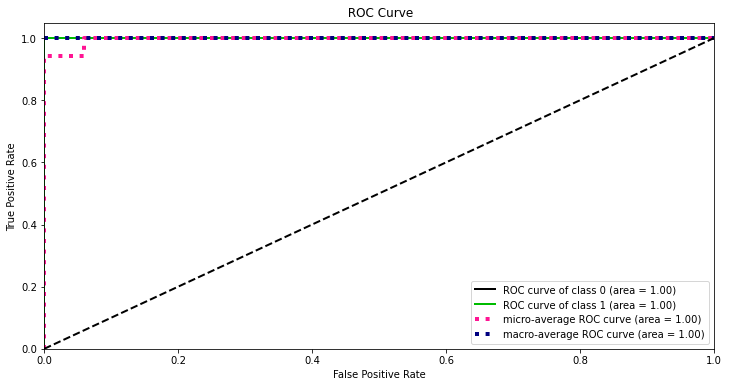

In [21]:
import scikitplot as skplt
Y_test_probs = grid_result.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

### Adding the second hidden layer

### Adding the output layer

## Part 3 - Training the ANN

### Compiling the ANN

### Training the ANN on the Training set

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

### Predicting the Test set results

In [ ]:
# y_pred = ann.predict(X_test)
# y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)